# Project 01: PyParticleBunch: Bunch Plotting Widget
---

## Prerequisites
Please complete the courses in ../00_Teaching_Material before attempting this project

- [ ] Introduction to Jupyter Notebooks
- [ ] Introduction to PyParticleBunch
- [ ] Introduction to Plotting with MatPlotLib

### Optional
- [ ] Introduction to iPython widgets

---
# Suggested Approach to Projects:

<div class="alert alert-block alert-success">
<b>Step 1 (Easy)</b> Prototype your code: play with python until it does what you want it to do!
</div>

<div class="alert alert-block alert-warning">
<b>Step 2 (Moderate):</b> Functions: convert your working messy code into nice clean functions, remember to think carefully about function and variable names, inputs to the function (arguments), and what it outputs.
</div>

<div class="alert alert-block alert-danger">
<b>Step 3 (Advanced) </b> Widget: try to use iPython widgets to turn your functions into a GUI (graphical user interface)
</div>

# Project Goal:

To produce a widget that reads a PyParticleBunch file, plot the bunch in a desired way, and save the plot to file.

Things to consider:
- What kind of plot is useful? 1D Histogram, 2D Scatter, 2D Heatmap, more...?
- Which co-ordinates are we plotting?
- What are the corresponding axis labels, title, axis limits?
- Do we want to add a grid or legend to the plot?
- What is the saved plot filename?

---
# Example Code

In [4]:
from PyParticleBunch import *
import ipywidgets as widgets
from IPython.display import display

In [5]:
beta_x = 3.215250830692
beta_y = 18.598794417925
alpha_x =  -0.547366008626
alpha_y =  2.750780302852
D_x =  -0.000103040524
D_xp = 0.001254020379
D_y = 0.
D_yp = 0.
emittance_x = emittance_y = 400 * 1E-6
x_limit = 5
y_limit = 5
n = 1E5

In [6]:
Matched_Gaussian_4D_bunch = ParticleBunch.MatchedGaussian_4D(n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y, x_limit = 5, y_limit = 5)

In [7]:
Matched_Gaussian_4D_bunch.print_file('Gaussian_Bunch.dat')

In [27]:
Bunch_In = ParticleBunch.from_file(input("Enter the file name"))

Enter the file nameGaussian_Bunch.dat
Loaded 0 particles
Loaded 10000 particles
Loaded 20000 particles
Loaded 30000 particles
Loaded 40000 particles
Loaded 50000 particles
Loaded 60000 particles
Loaded 70000 particles
Loaded 80000 particles
Loaded 90000 particles


In [28]:
x_data = Bunch_In.get_coordinate_array('x')
y_data = Bunch_In.get_coordinate_array('y')
xp_data = Bunch_In.get_coordinate_array('xp')
yp_data = Bunch_In.get_coordinate_array('yp')
t_data = Bunch_In.get_coordinate_array('t')
pt_data = Bunch_In.get_coordinate_array('pt')

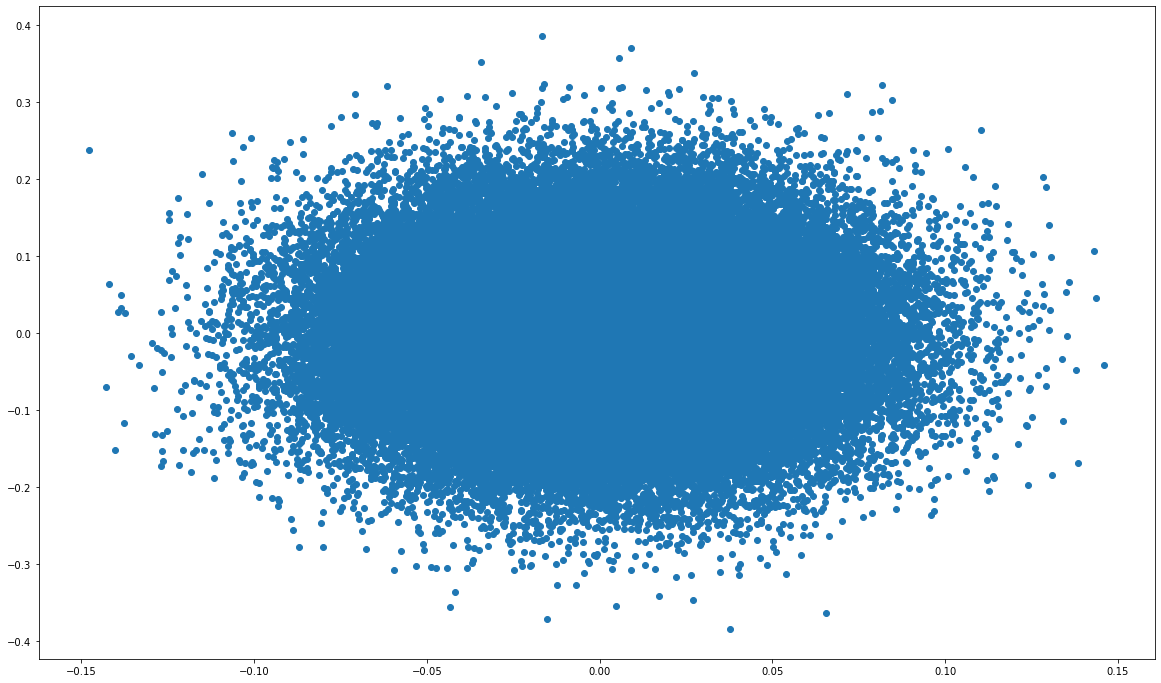

In [29]:
plt.scatter(x_data, y_data);

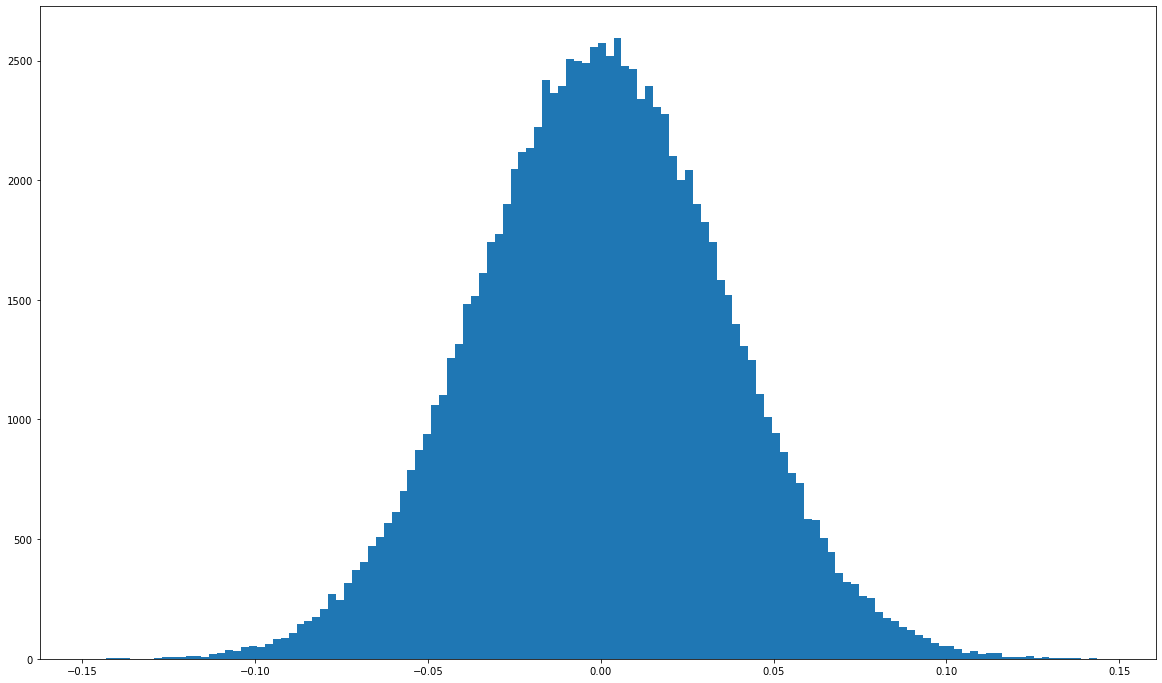

In [30]:
plt.hist(x_data, bins=128);

---
# Your turn

Can you try to create an iPython widget that does the following?

## Functionality Required (try adding one thing at a time)

- [ ] Read bunch from data file and generate PyParticleBunch
- [ ] Select which type of plot (histogram / scatter / heatmap etc)
- [ ] Select which co-ordinate(s) to plot
- [ ] Add axes labels, limits
- [ ] Add plot title
- [ ] Add plot legend and grid
- [ ] Save plot to file (user specificies filename)

### Bonus Tasks
- [ ] Read multiple bunch data files to produce similar plots for each
- [ ] Combine multiple generated bunch plots to create a GIF using imageio

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PyParticleBunch import *
import matplotlib.pyplot as plt
import numpy as np

def enterFile(b, fileNum=0):
    NumFiles = Files.value
    if fileNum >= NumFiles:
        return

    beta_x = 3.215250830692
    beta_y = 18.598794417925
    alpha_x =  -0.547366008626
    alpha_y =  2.750780302852
    D_x =  -0.000103040524
    D_xp = 0.001254020379
    D_y = 0.
    D_yp = 0.
    emittance_x = emittance_y = 400 * 1E-6
    x_limit = 5
    y_limit = 5
    n = 1E5

    Matched_Gaussian_4D_bunch = ParticleBunch.MatchedGaussian_4D(n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y, x_limit = 5, y_limit = 5)

    def OnFileEntered(b):
        Button_Pressed = True
        Matched_Gaussian_4D_bunch.print_file(fileName.value)
        Bunch_In = ParticleBunch.from_file(fileName.value)
        x_data = Bunch_In.get_coordinate_array('x')
        y_data = Bunch_In.get_coordinate_array('y')
        xp_data = Bunch_In.get_coordinate_array('xp')
        yp_data = Bunch_In.get_coordinate_array('yp')
        t_data = Bunch_In.get_coordinate_array('t')
        pt_data = Bunch_In.get_coordinate_array('pt')

        def dropdown_type_eventhandler(change):
            common_filtering(change.new, dropdown_x_axis.value, dropdown_y_axis.value)
        def dropdown_x_axis_eventhandler(change):
            common_filtering(dropdown_type.value, change.new, dropdown_y_axis.value)
        def dropdown_y_axis_eventhandler(change):
            common_filtering(dropdown_type.value, dropdown_x_axis.value, change.new)

        output = widgets.Output()
        plot_output = widgets.Output()

        dropdown_type = widgets.Dropdown(options =['Default', 'Histogram', 'Scatter graph', 'Heatmap'], description='Graph_Type')
        dropdown_x_axis = widgets.Dropdown(options=['Default / ignore for histogram', 'x', 'y', 'xp', 'yp', 't', 'pt'], description='x_axis')
        dropdown_y_axis = widgets.Dropdown(options=['Default', 'x', 'y', 'xp', 'yp', 't', 'pt'], description='y_axis')


        def common_filtering(Graph_Type, x_axis, y_axis):
            if x_axis == 'x':
                x_axis_data = x_data
            if x_axis == 'xp':
                x_axis_data = xp_data
            if x_axis == 'y':
                x_axis_data = y_data
            if x_axis == 'yp':
                x_axis_data = yp_data
            if x_axis == 't':
                x_axis_data = t_data
            if x_axis == 'pt':
                x_axis_data = pt_data
            if y_axis == 'x':
                y_axis_data = x_data
            if y_axis == 'xp':
                y_axis_data = xp_data
            if y_axis == 'y':
                y_axis_data = y_data
            if y_axis == 'yp':
                y_axis_data = yp_data
            if y_axis == 't':
                y_axis_data = t_data
            if y_axis == 'pt':
                y_axis_data = pt_data

            if Graph_Type == 'Scatter graph':
                if y_axis == 'Default' or x_axis == 'Default / ignore for histogram':
                    print('Error message: You will need to select the coordinates type in order to plot this graph.')
                else:
                    print('To save your plot to file, please enter a name for the file: ')
                    button = widgets.Button(description="Save")
                    inp = widgets.Text(description='File name:')
                    Box = widgets.HBox([button,inp])

                    def on_button_clicked(b):
                        plot_file_name = inp.value
                        print(inp)
                        print('Thank you, ' + plot_file_name + '.png will be the name of your file.')

                        if x_axis and y_axis:
                            plt.rcParams["figure.figsize"] = (20,12)
                            plt.scatter(x_axis_data, y_axis_data);
                            plt.grid(linestyle='-', linewidth='0.5', color='grey')
                            plt.title('Scatter for ' + str(x_axis) + ' against ' + str(y_axis), fontsize=15)
                            u_label = 'placeholder'
                            v_label = 'placeholder'

                            plt.xlabel(u_label, fontsize=15)
                            plt.ylabel(v_label, fontsize=15)
                            plt.savefig(plot_file_name + '.png')
                            enterFile(b, fileNum + 1)
                        return inp.value

                    path = button.on_click(on_button_clicked)
                    display(Box)

            if Graph_Type == 'Histogram':
                if y_axis == 'Default':
                    print('Error message: To make a histogram you will need to change the y_axis coordinates.')
                else:
                    print('To save your plot to file, please enter a name for the file: ')
                    button = widgets.Button(description="Save")
                    inp = widgets.Text(description='File name:')
                    Box = widgets.HBox([button,inp])

                    def on_button_clicked(b):
                        plot_file_name = inp.value
                        print(inp)
                        print('Thank you, ' + plot_file_name + '.png will be the name of your file.')

                        plt.rcParams["figure.figsize"] = (20,12)
                        plt.hist(y_axis_data, bins=128);
                        plt.grid(linestyle='-', linewidth='0.5', color='grey')
                        plt.title('Scatter for ' + y_axis, fontsize=15)
                        if y_axis == 'x':
                            u_label = 'x [m]'
                        elif y_axis == 'xp':
                            u_label = 'xp [-]'
                        elif y_axis == 'y':
                            u_label = 'y [m]'
                        elif y_axis == 'yp':
                            u_label = 'yp [-]'
                        elif y_axis == 't':
                            u_label = 't [m]'
                        elif y_axis == 'pt':
                            u_label = 'pt [-]'
                        plt.ylabel(u_label, fontsize=15)
                        print(plot_file_name)
                        plt.savefig(plot_file_name + '.png')
                        
                        enterFile(b, fileNum + 1)
                        return inp.value

                    path = button.on_click(on_button_clicked)
                    display(Box)
                    
            if Graph_Type == 'Heatmap':
                if y_axis == 'Default' or x_axis == 'Default / ignore for histogram':
                    print('Error message: To make a histogram you will need to change the y_axis coordinates.')
                else:
                    print('To save your plot to file, please enter a name for the file: ')
                    button = widgets.Button(description="Save")
                    inp = widgets.Text(description='File name:')
                    Box = widgets.HBox([button,inp])

                    def on_button_clicked(b):
                        plot_file_name = inp.value
                        print(inp)
                        print('Thank you, ' + plot_file_name + '.png will be the name of your file.')

                        plt.rcParams["figure.figsize"] = (20,12)
                        plt.hist2d(x_axis_data, y_axis_data, bins=128);
                        plt.grid(linestyle='-', linewidth='0.5', color='grey')
                        plt.title('HeatMap for ' + y_axis, fontsize=15)
                        if y_axis == 'x':
                            u_label = 'x [m]'
                        elif y_axis == 'xp':
                            u_label = 'xp [-]'
                        elif y_axis == 'y':
                            u_label = 'y [m]'
                        elif y_axis == 'yp':
                            u_label = 'yp [-]'
                        elif y_axis == 't':
                            u_label = 't [m]'
                        elif y_axis == 'pt':
                            u_label = 'pt [-]'
                        plt.ylabel(u_label, fontsize=15)
                        print(plot_file_name)
                        plt.savefig(plot_file_name + '.png')
                        
                        enterFile(b, fileNum + 1)
                        return inp.value

                    path = button.on_click(on_button_clicked)
                    display(Box)

        dropdown_type.observe(dropdown_type_eventhandler, names='value')
        dropdown_x_axis.observe(dropdown_x_axis_eventhandler, names='value')
        dropdown_y_axis.observe(dropdown_y_axis_eventhandler, names='value')
        display(dropdown_type)
        display(dropdown_x_axis)
        display(dropdown_y_axis)

    button_Pressed = False
    fileName = widgets.Text(
        description = "Enter File Name")
    fileEnterBox = widgets.Button(
        description = 'Enter')
    display(fileName)
    display(fileEnterBox)
    fileEnterBox.on_click(OnFileEntered)



def generate_widget():
    global Files
    Files = widgets.BoundedIntText(
        min=1,
        max=10,
        description='Number of Files')

    display(Files)

    EnterBox = widgets.Button(
        description = 'Enter Number')
    display(EnterBox)
    EnterBox.on_click(enterFile)

generate_widget()

BoundedIntText(value=1, description='Number of Files', max=10, min=1)

Button(description='Enter Number', style=ButtonStyle())

Text(value='', description='Enter File Name')

Button(description='Enter', style=ButtonStyle())

Loaded 0 particles
Loaded 10000 particles
Loaded 20000 particles
Loaded 30000 particles
Loaded 40000 particles
Loaded 50000 particles
Loaded 60000 particles
Loaded 70000 particles
Loaded 80000 particles
Loaded 90000 particles


Dropdown(description='Graph_Type', options=('Default', 'Histogram', 'Scatter graph', 'Heatmap'), value='Defaul…

Dropdown(description='x_axis', options=('Default / ignore for histogram', 'x', 'y', 'xp', 'yp', 't', 'pt'), va…

Dropdown(description='y_axis', options=('Default', 'x', 'y', 'xp', 'yp', 't', 'pt'), value='Default')